In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt
import datetime
import csv
import math
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [15]:
def relative_velocity(filename):
    '''
    Reads a COMBINED data file and outputs an array of relative velocities
    '''
    data = pd.read_csv(filename)
    Wind_Dir = data['FS_WD'] # degrees
    Wind_Spd = data['FS_WS'] *(1609.34/3600) # conversion to m/s
    Act_Dir = data['bearing(deg)'] # degrees
    Act_Spd = data['speed(m/s)'] #m/s
    
    rad_wind = (Wind_Dir-180)*(np.pi/180) # subtract 180 b/c reported direction is where wind is coming FROM
    rad_act = (Act_Dir)*(np.pi/180) # direction of activity
    u1 = Wind_Spd*np.sin(rad_wind)
    v1 = Wind_Spd*np.cos(rad_wind)
    u2 = Act_Spd*np.sin(rad_act)
    v2 = Act_Spd*np.cos(rad_act)
    vect1 = np.sqrt(u1**2+u2**2)
    vect2 = np.sqrt(v1**2+v2**2)
    alpha = []
    for i in range(0,len(Wind_Spd)):
        angle = np.arccos(((u1[i]*v1[i])+(u2[i]*v2[i])) / (vect1[i]*vect2[i]))
        alpha = np.append(angle,alpha)
    alpha = alpha[::-1]
    v_r = np.sqrt(Wind_Spd**2+Act_Spd**2 - (2*Wind_Spd*Act_Spd*np.cos(np.pi+alpha)))
    return v_r,u1,v1,u2,v2

In [16]:
v_r,u1,v1,u2,v2 = relative_velocity('May5.csv')

In [18]:
v_r.describe()

count    588.000000
mean       6.381496
std        2.211582
min        0.444269
25%        5.163858
50%        6.780887
75%        7.974157
max       11.969190
dtype: float64

In [5]:
Mar30 = pd.read_csv('May5.csv')

In [6]:
lat_deg = Mar30['lat(DD)']
lon_deg = Mar30['lon(DD)']

In [7]:
from coordinateSystems import GeographicSystem
alt = np.zeros_like(np.array(lat_deg))

In [8]:
geo = GeographicSystem() 
X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Use degrees
stack = np.vstack((X,Y,Z))

In [9]:
lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
from coordinateSystems import TangentPlaneCartesianSystem

tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
local = (tangent.toLocal(stack))

In [10]:
local2 = local[:,:].T # The local coords transposed

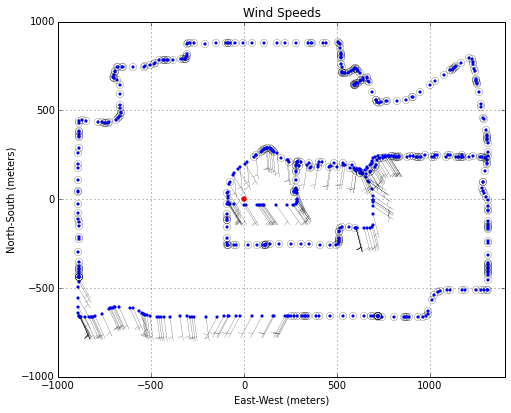

In [11]:
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(211)
ax.set_xlim(-1000,1400)

ax.scatter(0,0,c='r',s=30,linewidths=0)
for i in range(0,len(lat_deg)):
    ax.scatter(local2[i,:2][0],local2[i,:2][1],s=10,linewidths=0)
    ax.barbs(local2[i,:2][0],local2[i,:2][1],u1[i],v1[i],linewidth=0.1)
    #ax.quiver(local2[i,:2][0],local2[i,:2][1],u[i],v[i],linewidth=0,width=0.001,headwidth=15)
ax.set_title('Wind Speeds')
ax.set_xlabel('East-West (meters)')
ax.set_ylabel('North-South (meters)')
ax.grid()

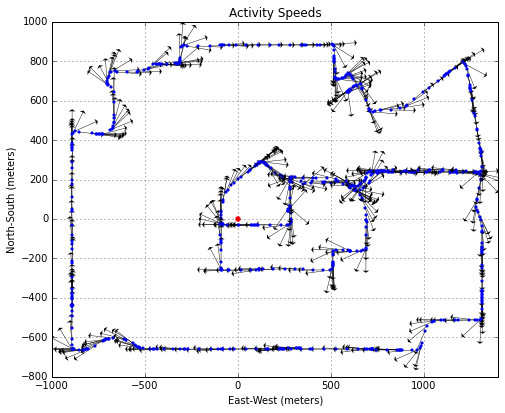

In [12]:
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(211)
ax.set_xlim(-1000,1400)

ax.scatter(0,0,c='r',s=30,linewidths=0)
for i in range(0,len(lat_deg)):
    ax.scatter(local2[i,:2][0],local2[i,:2][1],s=10,linewidths=0)
    #ax.barbs(local2[i,:2][0],local2[i,:2][1],u1[i],v1[i],linewidth=0.1)
    ax.quiver(local2[i,:2][0],local2[i,:2][1],u2[i],v2[i],linewidth=0,width=0.001,headwidth=15)
ax.set_title('Activity Speeds')
ax.set_xlabel('East-West (meters)')
ax.set_ylabel('North-South (meters)')
ax.grid()

In [13]:
print v_r.describe()

count    588.000000
mean       6.381496
std        2.211582
min        0.444269
25%        5.163858
50%        6.780887
75%        7.974157
max       11.969190
dtype: float64


In [23]:
#statistics = v_r.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
stat_vr = v_r.describe(percentiles=[0.25,0.5,0.75])

In [25]:
stat_vr[4]

5.1638583588012352

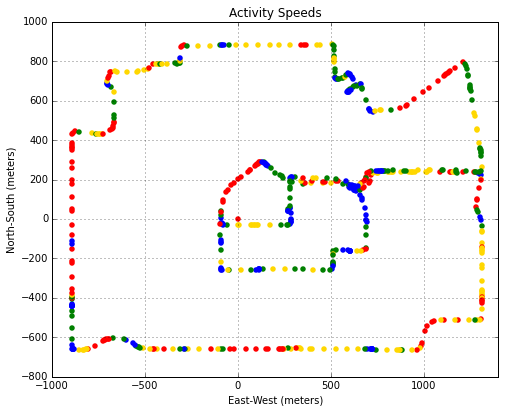

In [26]:
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(211)
ax.set_xlim(-1000,1400)

ax.scatter(0,0,c='r',s=30,linewidths=0)
for i in range(0,len(lat_deg)):
    if (v_r[i] < stat_vr[4]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='b',linewidths=0,)
    elif (v_r[i] >= stat_vr[4]) & (v_r[i] <= stat_vr[5]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='green',linewidths=0,)
    elif (v_r[i] >= stat_vr[5]) & (v_r[i] <= stat_vr[6]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='gold',linewidths=0,)
    elif (v_r[i] > stat_vr[6]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='r',linewidths=0,)
    else:
        pass
        
ax.set_title('Activity Speeds')
ax.set_xlabel('East-West (meters)')
ax.set_ylabel('North-South (meters)')
ax.grid()

In [15]:
CO = Mar30['SCK2_CO']

In [16]:
CO.describe()

count    588.000000
mean     368.103111
std       30.151018
min      264.332400
25%      356.595600
50%      368.787600
75%      385.146800
max      438.959600
dtype: float64

In [17]:
from scipy import stats

In [29]:
CO.describe() #count, min/max, variance, skewness, kurtosis

count    588.000000
mean     368.103111
std       30.151018
min      264.332400
25%      356.595600
50%      368.787600
75%      385.146800
max      438.959600
dtype: float64

In [27]:
stat_co = CO.describe(percentiles=[0.25,0.5,0.75])

In [28]:
stat_co[4]

356.59559999999999

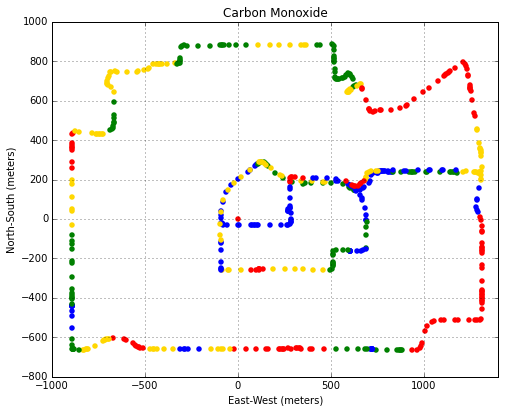

In [30]:
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(211)
ax.set_xlim(-1000,1400)

ax.scatter(0,0,c='r',s=30,linewidths=0)
for i in range(0,len(lat_deg)):
    if (CO[i] < stat_co[4]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='b',linewidths=0,)
    elif (CO[i] >= stat_co[4]) & (CO[i] <= stat_co[5]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='green',linewidths=0,)
    elif (CO[i] >= stat_co[5]) & (CO[i] <= stat_co[6]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='gold',linewidths=0,)
    elif (CO[i] > stat_co[6]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='r',linewidths=0,)
    else:
        pass
        
ax.set_title('Carbon Monoxide')
ax.set_xlabel('East-West (meters)')
ax.set_ylabel('North-South (meters)')
ax.grid()

In [31]:
stat = CO.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [262]:
#np.percentile(CO,[1,1,1,10,20,30,40,50,60,70,80,90])

In [35]:
stat

count    588.000000
mean     368.103111
std       30.151018
min      264.332400
10%      327.394800
20%      349.813200
30%      357.803200
40%      363.464400
50%      368.787600
60%      373.058800
70%      380.431200
80%      393.216800
90%      406.102000
max      438.959600
dtype: float64

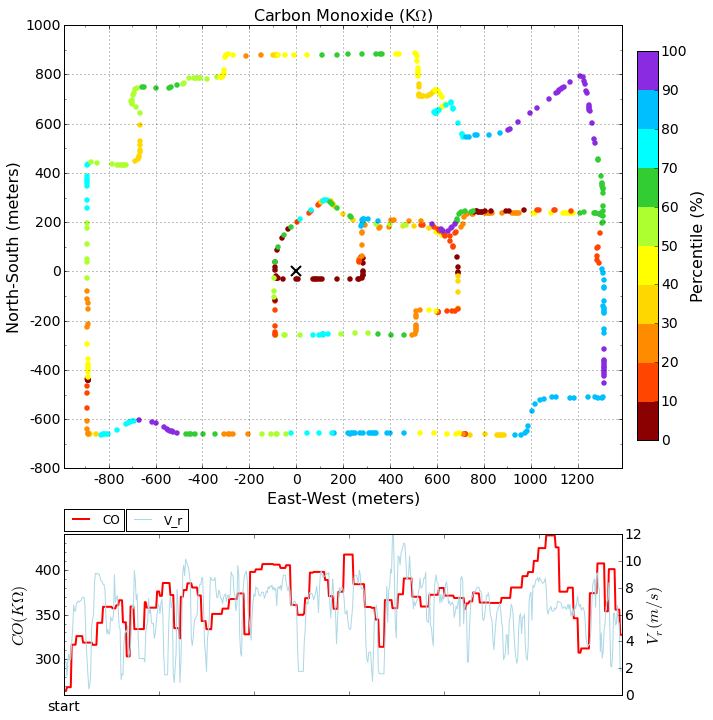

In [206]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(12,1,(1,8))
ax.set_xlim(-990,1390)
ax.scatter(0,0,c='black',s=100,linewidths=2,marker='x') # point of fixed site
for i in range(0,len(lat_deg)):
    if (CO[i] < stat[4]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='darkred',linewidths=0,)#'darkred'
    elif (CO[i] >= stat[4]) & (CO[i] <= stat[5]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='orangered',linewidths=0,)#'orangered'
    elif (CO[i] >= stat[5]) & (CO[i] <= stat[6]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='darkorange',linewidths=0,)#'darkorange'
    elif (CO[i] >= stat[6]) & (CO[i] <= stat[7]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='gold',linewidths=0,)#'gold'
    elif (CO[i] >= stat[7]) & (CO[i] <= stat[8]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='yellow',linewidths=0,)#'yellow'
    elif (CO[i] >= stat[8]) & (CO[i] <= stat[9]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='greenyellow',linewidths=0,)#'greenyellow'
    elif (CO[i] >= stat[9]) & (CO[i] <= stat[10]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='limegreen',linewidths=0,)#'limegreen'
    elif (CO[i] >= stat[10]) & (CO[i] <= stat[11]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='cyan',linewidths=0,)#'cyan'
    elif (CO[i] >= stat[11]) & (CO[i] <= stat[12]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='deepskyblue',linewidths=0,)#'deepskyblue'
    elif (CO[i] > stat[12]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='blueviolet',linewidths=0,)#'blueviolet'
    else:
        pass
ax.set_title('Carbon Monoxide (K$\Omega$)',fontsize=16)
ax.set_xlabel('East-West (meters)',fontsize=16)
ax.set_ylabel('North-South (meters)',fontsize=16)

majorLocator = MultipleLocator(200)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(100)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(labelsize=14)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)
ax.yaxis.set_minor_locator(minorLocator)
ax.grid()


# colorbar
ax2 = fig.add_axes([0.92,
                    0.42, #position
                    0.03, #width
                    0.45]) #length from bottom
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=10)
cmap = mpl.colors.ListedColormap(['darkred', 'orangered', 'darkorange', 
                                  'gold','yellow','greenyellow',
                                  'limegreen','cyan','deepskyblue','blueviolet'])
                                #'blueviolet', 'deepskyblue', 'cyan', 
                                  #'limegreen','greenyellow','yellow',
                                  #'gold','darkorange','orangered','darkred']
#cmap.set_over('0.25')
#cmap.set_under('0.75')
bounds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm,
                                # to use 'extend', you must
                                # specify two extra boundaries:
                                #boundaries=[0] + bounds + [13],
                                #extend='both',
                                ticks=bounds,  # optional
                                spacing='proportional',
                                orientation='vertical')
cb.set_label('Percentile (%)',fontsize=16)
cb.ax.tick_params(labelsize=14)

ax3 = fig.add_subplot(12,1,(10,12))
ax3.plot(CO,c='r',linewidth=2,label='CO')
ax3.yaxis.set_major_locator(MultipleLocator(50))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax3.yaxis.set_minor_locator(MultipleLocator(10))
ax3.xaxis.set_ticklabels(['start'])
ax3.set_ylabel('$CO (K\Omega)$', fontsize=16)
ax3.tick_params(labelsize=14)
ax3.set_xlim(0,len(CO))
#ax3.grid()
ax3.legend(loc=(0,1.02))


ax4 = ax3.twinx()
ax4.plot(v_r,c='lightblue',linewidth=1,linestyle='-',label='V_r')
ax4.tick_params(labelsize=14)
ax4.set_xlim(0,len(v_r))
ax4.set_ylabel('$V_r (m/s)$', fontsize=16)
ax4.legend(loc=(0.11,1.02))

In [280]:
NO2 = Mar30['SCK2_NO2']

In [281]:
from scipy import signal

In [282]:
no2 = signal.detrend(NO2)+np.mean(NO2)

In [283]:
statn = np.percentile(no2,[1,1,1,10,20,30,40,50,60,70,80,90,100])

In [284]:
print statn

[ 29.38601745  29.38601745  29.38601745  31.6554578   32.37619635
  32.94255728  33.45158318  34.04019778  34.75841859  35.60741389
  36.33141955  37.30677528  40.22556989]


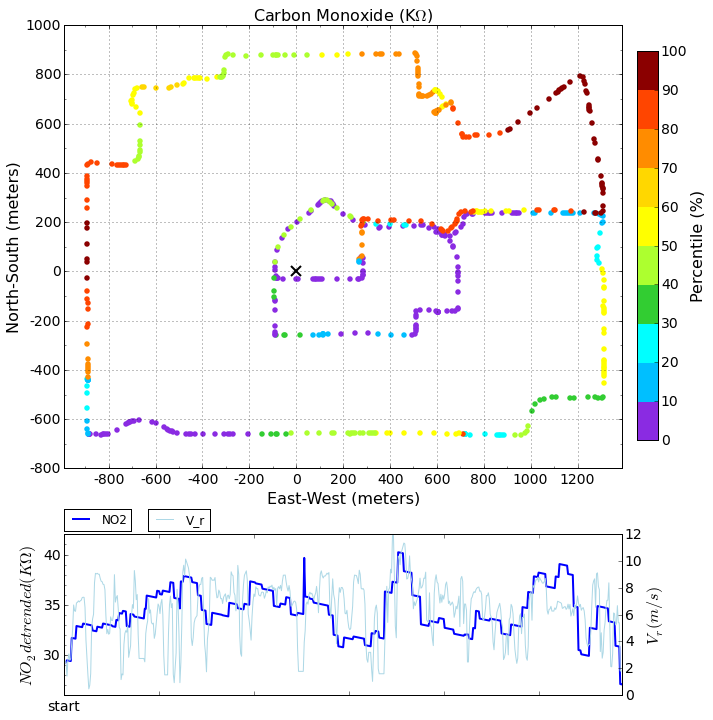

In [291]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(12,1,(1,8))
ax.set_xlim(-990,1390)
ax.scatter(0,0,c='black',s=100,linewidths=2,marker='x') # point of fixed site
for i in range(0,len(lat_deg)):
    if (NO2[i] < statn[4]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='blueviolet',linewidths=0,)#'darkred'
    elif (NO2[i] >= statn[4]) & (NO2[i] <= statn[5]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='deepskyblue',linewidths=0,)#'orangered'
    elif (NO2[i] >= statn[5]) & (NO2[i] <= statn[6]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='cyan',linewidths=0,)#'darkorange'
    elif (NO2[i] >= statn[6]) & (NO2[i] <= statn[7]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='limegreen',linewidths=0,)#'gold'
    elif (NO2[i] >= statn[7]) & (NO2[i] <= statn[8]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='greenyellow',linewidths=0,)#'yellow'
    elif (NO2[i] >= statn[8]) & (NO2[i] <= statn[9]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='yellow',linewidths=0,)#'greenyellow'
    elif (NO2[i] >= statn[9]) & (NO2[i] <= statn[10]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='gold',linewidths=0,)#'limegreen'
    elif (NO2[i] >= statn[10]) & (NO2[i] <= statn[11]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='darkorange',linewidths=0,)#'cyan'
    elif (NO2[i] >= statn[11]) & (NO2[i] <= statn[12]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='orangered',linewidths=0,)#'deepskyblue'
    elif (NO2[i] > statn[12]):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='darkred',linewidths=0,)#'blueviolet'
    else:
        pass
ax.set_title('Carbon Monoxide (K$\Omega$)',fontsize=16)
ax.set_xlabel('East-West (meters)',fontsize=16)
ax.set_ylabel('North-South (meters)',fontsize=16)

majorLocator = MultipleLocator(200)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(100)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(labelsize=14)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)
ax.yaxis.set_minor_locator(minorLocator)
ax.grid()


# colorbar
ax2 = fig.add_axes([0.92,
                    0.42, #position
                    0.03, #width
                    0.45]) #length from bottom
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=10)
cmap = mpl.colors.ListedColormap(['blueviolet', 'deepskyblue', 'cyan', 
                                  'limegreen','greenyellow','yellow',
                                  'gold','darkorange','orangered','darkred'])
                                  #['darkred', 'orangered', 'darkorange', 
                                  #'gold','yellow','greenyellow',
                                  #'limegreen','cyan','deepskyblue','blueviolet'])
bounds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm,
                                # to use 'extend', you must
                                # specify two extra boundaries:
                                #boundaries=[0] + bounds + [13],
                                #extend='both',
                                ticks=bounds,  # optional
                                spacing='proportional',
                                orientation='vertical')
cb.set_label('Percentile (%)',fontsize=16)
cb.ax.tick_params(labelsize=14)

ax3 = fig.add_subplot(12,1,(10,12))
ax3.plot(no2,c='b',linewidth=2,label='NO2')
ax3.yaxis.set_major_locator(MultipleLocator(5))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax3.yaxis.set_minor_locator(MultipleLocator(1))
ax3.xaxis.set_ticklabels(['start'])
ax3.set_ylabel('$NO_2 detrended (K\Omega)$', fontsize=16)
ax3.tick_params(labelsize=14)
ax3.set_xlim(0,len(no2))
#ax3.grid()
ax3.legend(loc=(0,1.02))


ax4 = ax3.twinx()
ax4.plot(v_r,c='lightblue',linewidth=1,linestyle='-',label='V_r')
ax4.tick_params(labelsize=14)
ax4.set_xlim(0,len(v_r))
ax4.set_ylabel('$V_r (m/s)$', fontsize=16)
ax4.legend(loc=(0.15,1.02))

In [202]:
print len(v_r), len(CO)

588 588
